# Description

This notebook looks at some simple statistics of histortical intraday equity data. First we look at midprice and microprice, then order imbalance, stamped every 100 millisecond of the trading day. We will see that order imbalance tends to mean-revert, and has siginificant auto-correlation. Next, we look at the behaviour of order imbalance an instant before market order buys or sells arrive. The interesting aspect of this is that buy orders tend to arrive when the order imbalance is tilted to the buy side, while sell orders tend to arrive when the order imbalance is tilted to the sell side.

In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs
import pandas as pd

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## load data

In [2]:
data = sio.loadmat(r'O:\Second Semister\High Frequency Trading\FB_20141126.mat')
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'LOB'])

In [3]:
data.get('__header__')

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon May 22 15:31:30 2017'

In [4]:
LOB=data.get('LOB')
LOB.dtype

dtype([('NumberMO', 'O'), ('VolumeMO', 'O'), ('EventTime', 'O'), ('BuyPrice', 'O'), ('SellPrice', 'O'), ('BuyVolume', 'O'), ('SellVolume', 'O'), ('MO', 'O')])

In [5]:
#
time = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
#
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
#
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
#
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
#
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
#
MO=np.array(LOB['MO'][0][0]*1.0)
#
dt = time[1]-time[0]

# Question 1
### Midprice, Microprice and Spread

In [6]:
midprice = 0.5*(bid[:,0]+ask[:,0])
midprice

array([75.485, 75.485, 75.505, ..., 77.635, 77.635, 77.635])

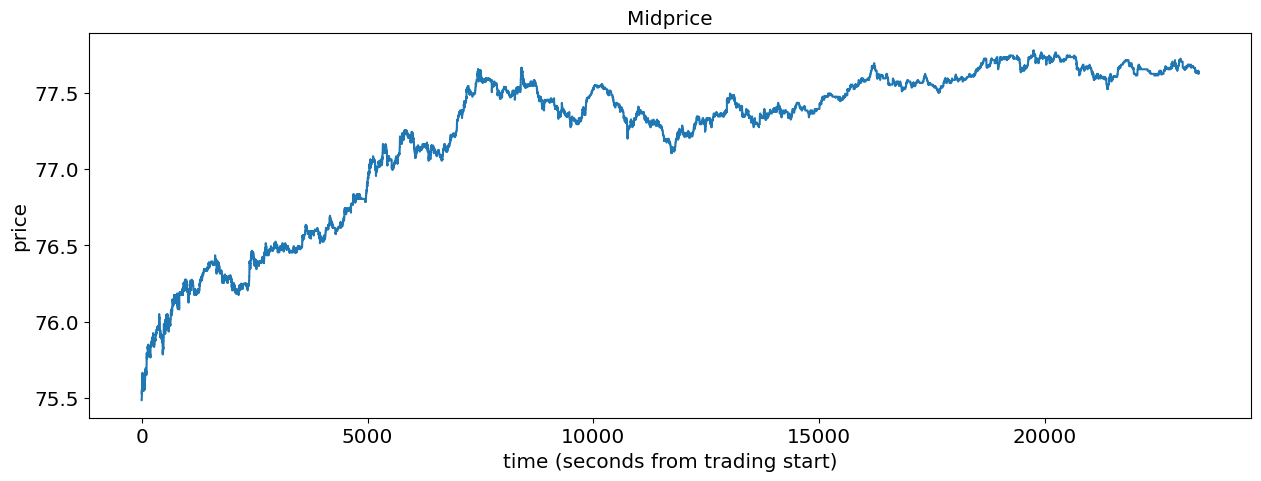

In [7]:
plt.plot(time, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [8]:
min_ts= midprice.argmin()
max_ts= midprice.argmax() 
print(f'The lowest midprice happend at {min_ts} second and the higest midprice happend at {max_ts} second of starting trade.')

The lowest midprice happend at 0 second and the higest midprice happend at 197464 second of starting trade.


In [9]:
df_midprice = pd.DataFrame(midprice)
df_midprice.describe()

,0
count,234000.000000
mean,77.237420
std,0.497852
min,75.485000
25%,77.105000
50%,77.405000
75%,77.595000
max,77.780000


In [10]:
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
microprice

array([75.49815249, 75.49815249, 75.50833333, ..., 77.63290061,
       77.63290061, 77.63130201])

plot microprice

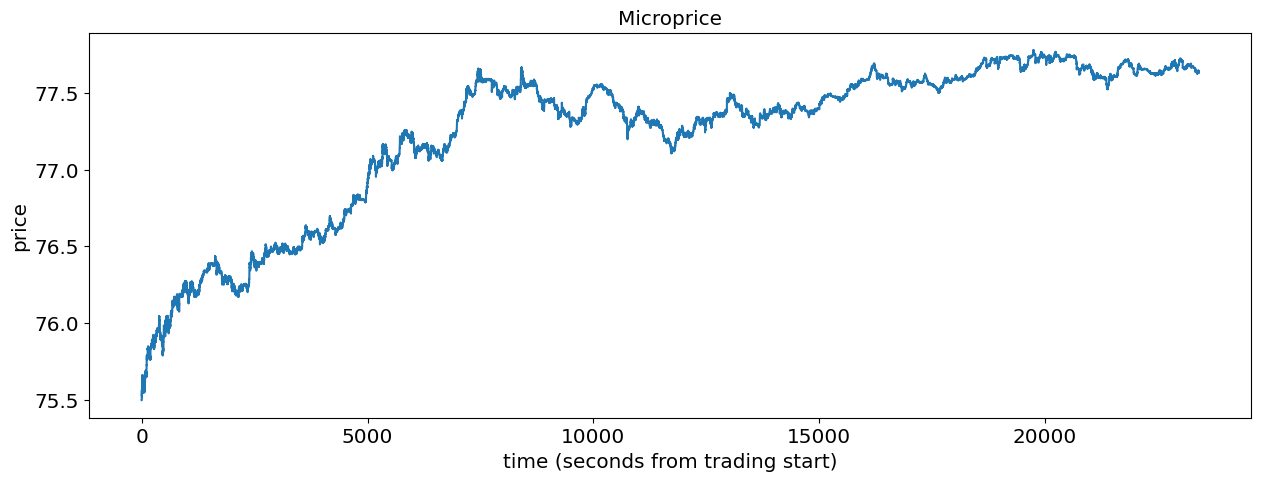

In [11]:
plt.plot(time, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [12]:
min_ts= microprice.argmin()
max_ts= microprice.argmax() 
print(f'The lowest microprice happend at {min_ts} second and the higest microprice happend at {max_ts} second of starting trade.')

The lowest microprice happend at 0 second and the higest microprice happend at 197386 second of starting trade.


In [13]:
df_microprice = pd.DataFrame(microprice)
df_microprice.describe()


,0
count,234000.000000
mean,77.237172
std,0.497735
min,75.498152
25%,77.108171
50%,77.403333
75%,77.590193
max,77.776842


plot the difference between micro and mid prices

In [14]:
diff_mid_micro =  pd.DataFrame((microprice-midprice))
min_ts = diff_mid_micro.idxmin()
max_ts = diff_mid_micro.idxmax()
print(f'''The smallest diffrence between midprice and microprice happend at {min_ts.values[0]} second
and the biggest diffrence between midprice and microprice happend at {max_ts.values[0]} second of starting trade.''')

The smallest diffrence between midprice and microprice happend at 832 second
and the biggest diffrence between midprice and microprice happend at 17837 second of starting trade.


In [15]:
print(f' The smallest diffrence between midprice and microprice is  {round(diff_mid_micro.iloc[832].values[0], 5)} ')

 The smallest diffrence between midprice and microprice is  -0.01621 


In [16]:
diff_mid_micro.describe()

,0
count,234000.000000
mean,-0.000248
std,0.002631
min,-0.016206
25%,-0.002262
50%,-0.000333
75%,0.001695
max,0.015556


In [17]:
e_zero = (diff_mid_micro[diff_mid_micro[0]==0]).count().values[0]
print( f' {e_zero} times midprice and microprice are equal during trading period.')

 1448 times midprice and microprice are equal during trading period.


In [18]:
bigger = (diff_mid_micro[diff_mid_micro[0]>0]).count().values[0]
print( f' {bigger} times microprice are bigger than midprice during trading period.')

 106451 times microprice are bigger than midprice during trading period.


In [19]:
smaller = (diff_mid_micro[diff_mid_micro[0]<0]).count().values[0]
print( f' {smaller} times microprice are smaller than midprice during trading period.')

 126101 times microprice are smaller than midprice during trading period.


In [20]:
mid_micro = pd.concat([pd.DataFrame(microprice),pd.DataFrame(midprice)])
print(f'covariance of the diffrence is {mid_micro.cov().values[0]} and its corrolation is {mid_micro.corr().values[0]} ')

covariance of the diffrence is [0.24779751] and its corrolation is [1.] 


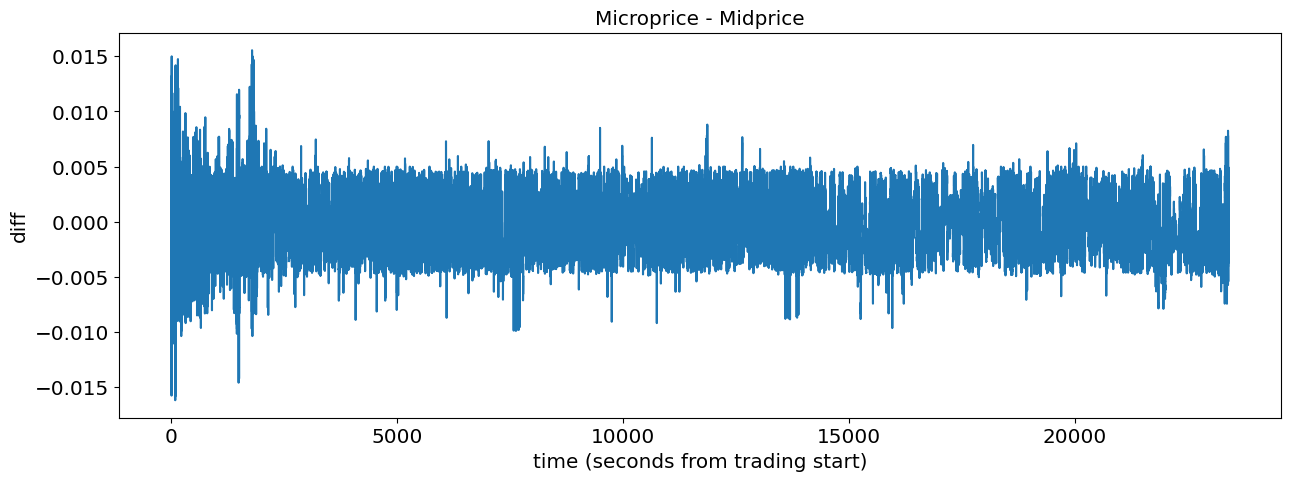

In [21]:
plt.plot(time, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

### spread

In [22]:
spread = ask[:,0]-bid[:,0]
spread

array([0.03, 0.03, 0.01, ..., 0.01, 0.01, 0.01])

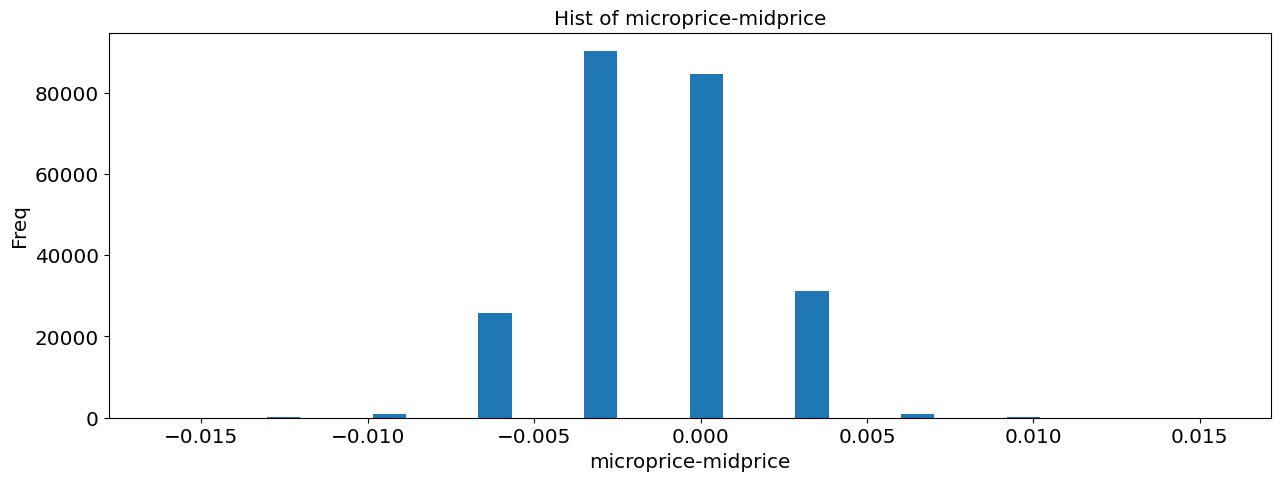

In [23]:
plt.hist(microprice-midprice, width=0.001,align='mid') 
plt.title("Hist of microprice-midprice")
plt.xlabel(r'microprice-midprice')
plt.ylabel('Freq')
plt.show()

Note that the difference is typically in the range [-0.01, 0.01] while at the beginning of the day it is three times as large.

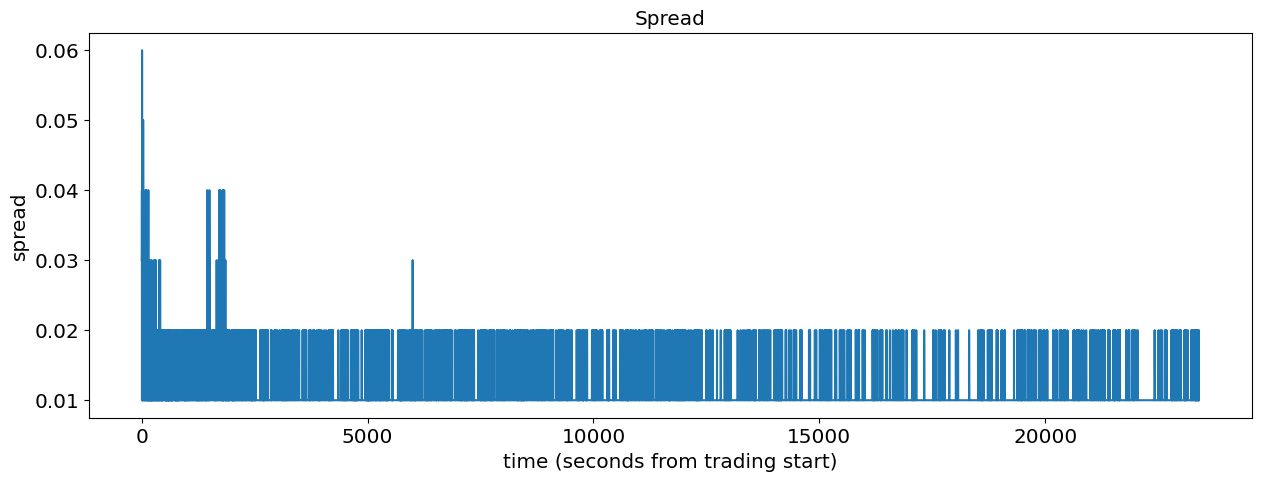

In [24]:
plt.plot(time,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

This plot shows that the spread is about 0.13 in the morning, but quickly drops to 0.01 but sometimes spikes to 0.02 (mostly in the morning).

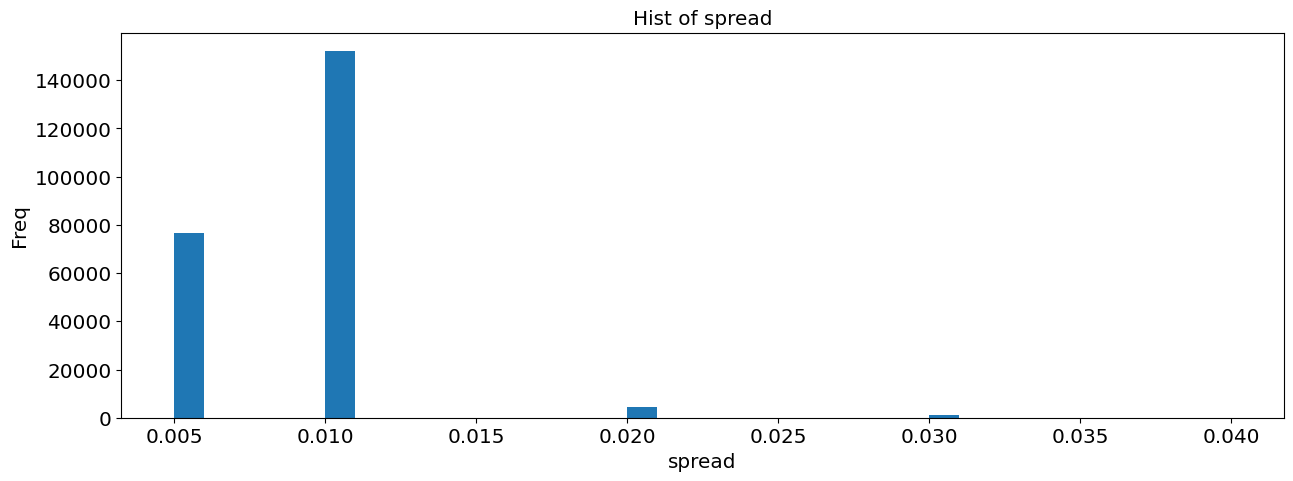

In [25]:
plt.hist(spread,bins=[0.005,0.01,0.02, 0.03,0.04], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

In [26]:
print(f'The highest spread happend at {spread.argmax()} second of trading strat.')

The highest spread happend at 43 second of trading strat.


In [27]:
print(f'The highest spread happend at {spread.argmin()} second of trading strat.')

The highest spread happend at 26 second of trading strat.


In [28]:
df_spread = pd.DataFrame(spread)
df_spread.describe()

,0
count,234000.000000
mean,0.010736
std,0.002859
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.060000


In [29]:
df_spread[df_spread==0].count()
print(f'The Spread has never been zero.')

The Spread has never been zero.


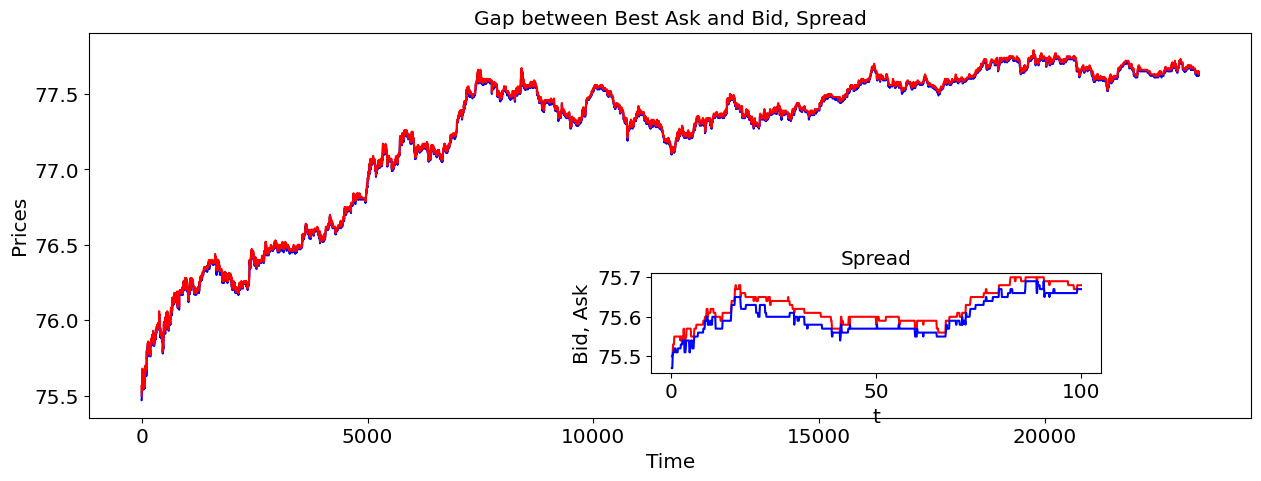

In [30]:
#plt.figure(figsize=(5, 2.7), layout='constrained') 

plt.plot(time, bid[:,0], label ='Best Bid',color='blue')  # Plot some data on the (implicit) axes. 

plt.plot(time, ask[:,0], label = 'Best Ask' ,color='red')  # etc. 

plt.xlabel('Time') 

plt.ylabel('Prices') 

plt.title("Gap between Best Ask and Bid, Spread") 

#plt.xticks([10000,12500,15000]) 

#plt.legend() 

a = plt.axes([.5, .2, .3, .2]) 

dis = (time>0) & (time<=100) 

plt.plot( time[dis], ask[:,0][dis], color='red') 

plt.plot( time[dis], bid[:,0][dis], color='blue') 

plt.title('Spread') 

plt.ylabel('Bid, Ask') 

plt.xlabel('t') 

plt.xticks([0,50,100]) 

plt.show() 

## Volume Imbalance

In [31]:
VI = np.array((bidvol[:,0]-askvol[:,0])).T

In [32]:
print(VI.argmax())
print(VI.argmin())
print(VI.shape)

233990
75286
(234000,)


## Order Imbalance

In [33]:
bid[:,0]

array([75.47, 75.47, 75.5 , ..., 77.63, 77.63, 77.63])

Text(600, -250000, '$rho =\\frac{p^b-p^a}{p^b+p^a}$ ')

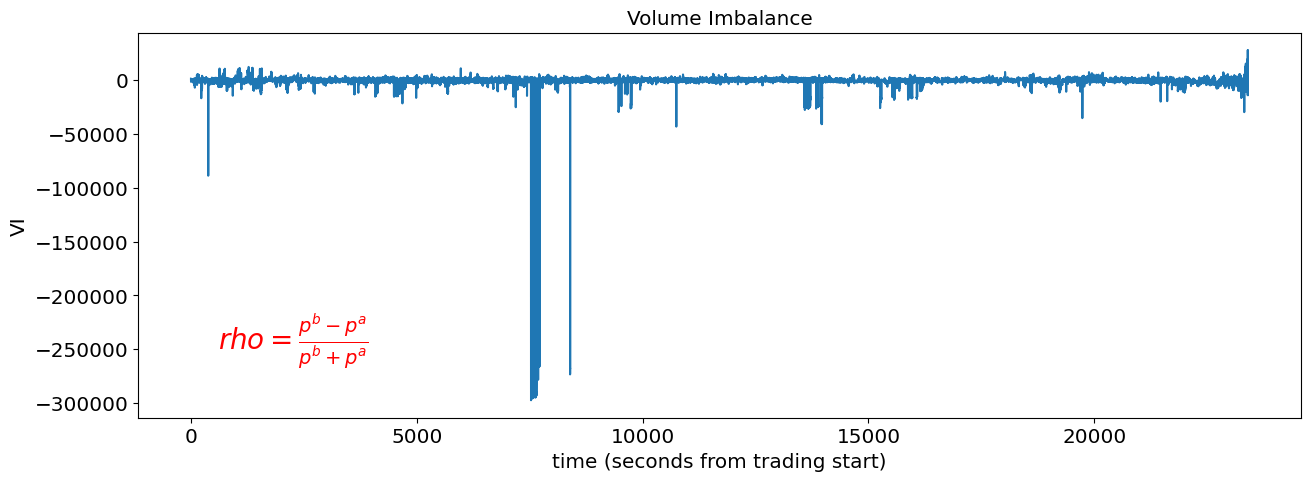

In [34]:
plt.plot(time, VI)
plt.title('Volume Imbalance')
plt.ylabel(r'VI')
plt.xlabel('time (seconds from trading start)')
plt.text(600,-250000, r'$rho =\frac{p^b-p^a}{p^b+p^a}$ ', fontsize = 20, color = 'r')


In [35]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

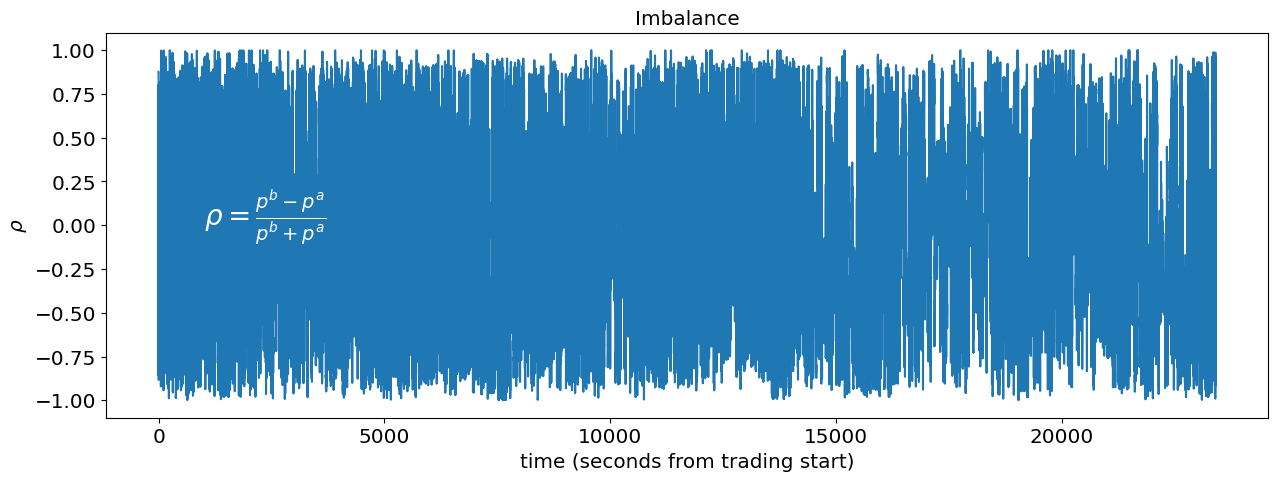

In [49]:
plt.plot(time, rho)
plt.text(1000,0, r'$\rho=\frac{p^b-p^a}{p^b+p^a}$ ', fontsize = 20, color = 'w')
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')


plt.show()

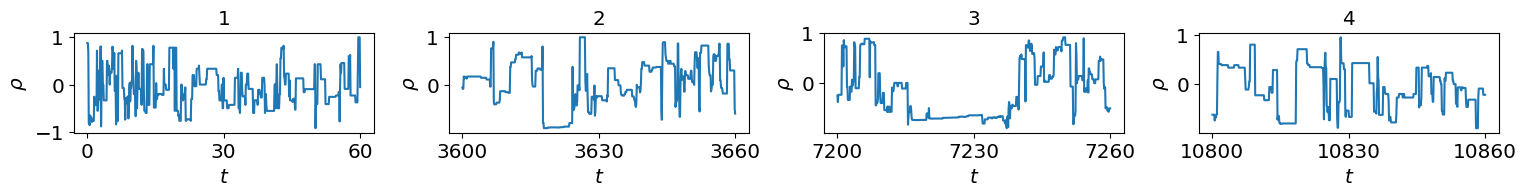

In [51]:
for i in range(4):
    a = plt.axes([.2+(i*0.25), .6, .2, .2])
    xt = 3600 * i
    idx = (time>xt) & (time<=xt+60)
    plt.plot( time[idx], rho[idx])
    plt.title(i+1)
    plt.ylabel(r'$\rho$')
    plt.xlabel(r'$t$')
    plt.xticks([xt,xt+30,xt+60])


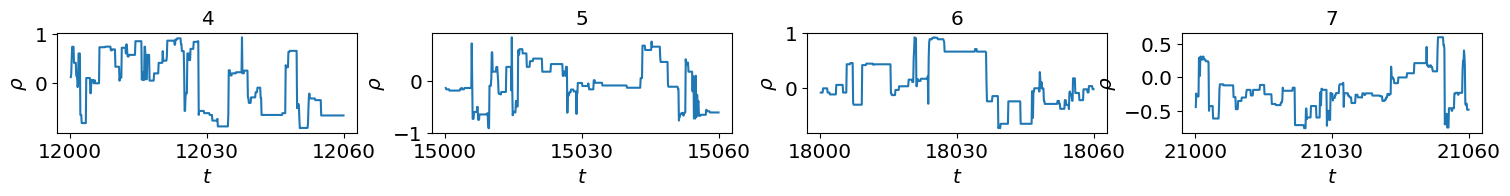

In [58]:
for i in range(4):
    a = plt.axes([.18+(i*0.25), .6, .2, .2])
    xt = 3000 * (i+4)
    idx = (time>xt) & (time<=xt+60)
    plt.plot( time[idx], rho[idx])
    plt.title(i+4)
    plt.ylabel(r'$\rho$')
    plt.xlabel(r'$t$')
    plt.xticks([xt,xt+30,xt+60])


In [59]:
df_rho = pd.DataFrame(rho)
df_rho.describe()

,0
count,234000.000000
mean,-0.049366
std,0.489329
min,-0.999328
25%,-0.436778
50%,-0.062500
75%,0.331558
max,0.999498


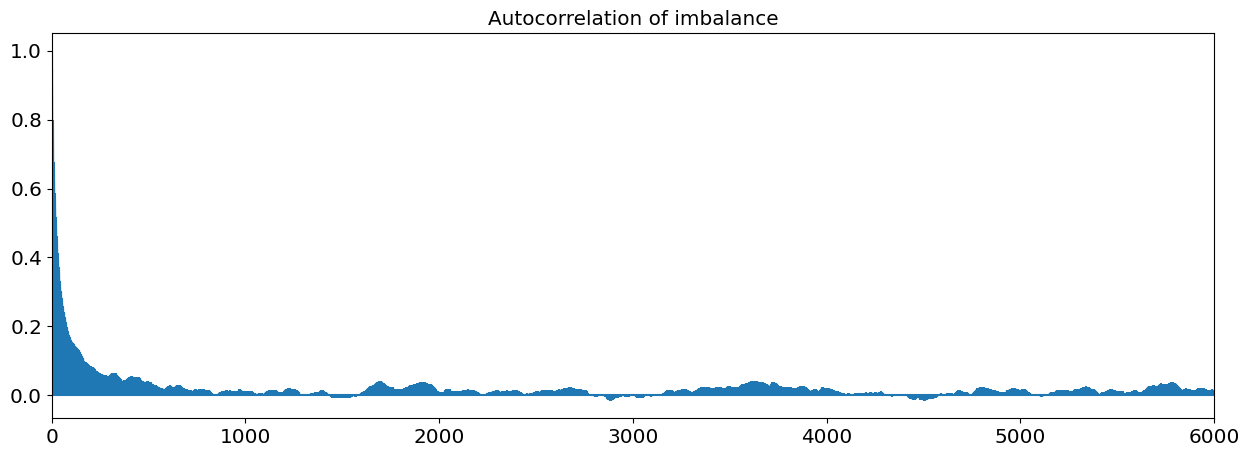

In [59]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

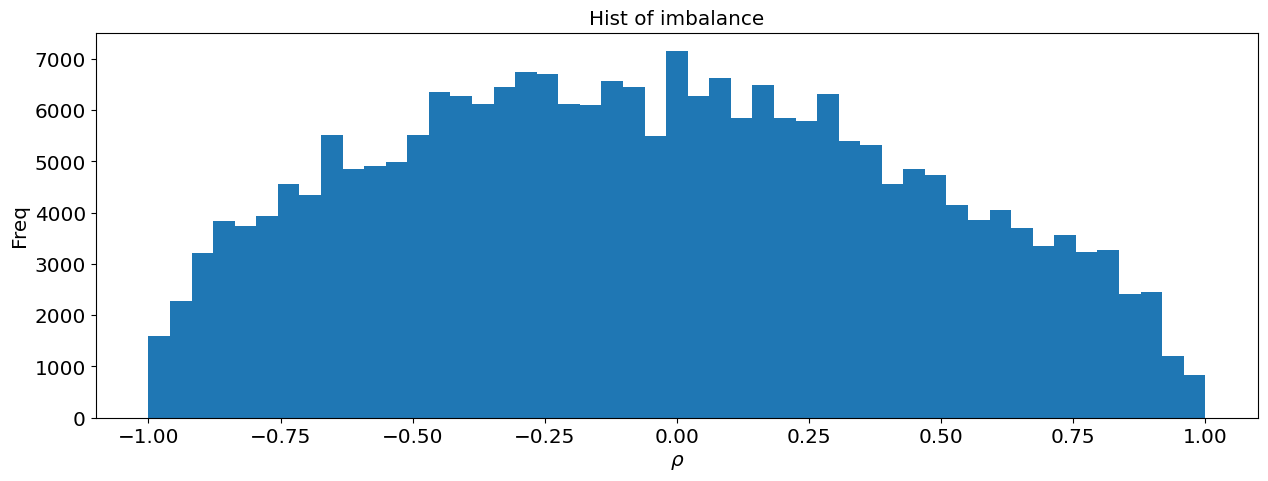

In [60]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

## Volume Imbalance at times of Market Orders

In [61]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

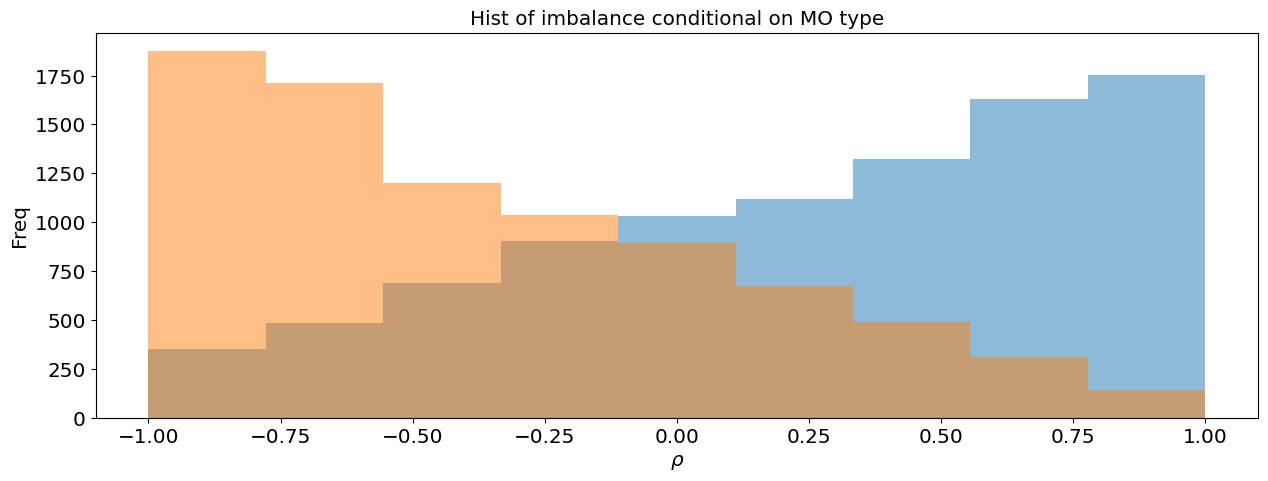

In [62]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

# Question 2

### Liquidation_Permanent_Price_Impact_helper Module:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
import ipywidgets as widgets
import import_ipynb


### parts d 

In [57]:
# parameters
S0 = 100
R = 10 ** 6 #Initial number of stocks
T = 1; 
k = 0.0006
b = 0.0004
M = int(6.5 * 3600)    #Number of trading times
alpha = 0.1; 
phi = 0.01;
sigma = 0.30;

In [58]:
gamma = np.sqrt(phi/k)
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi))

tt = np.linspace(0, 1, int(M + 1))


In [59]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * R


Text(0.5, 1.0, 'Trading Speed')

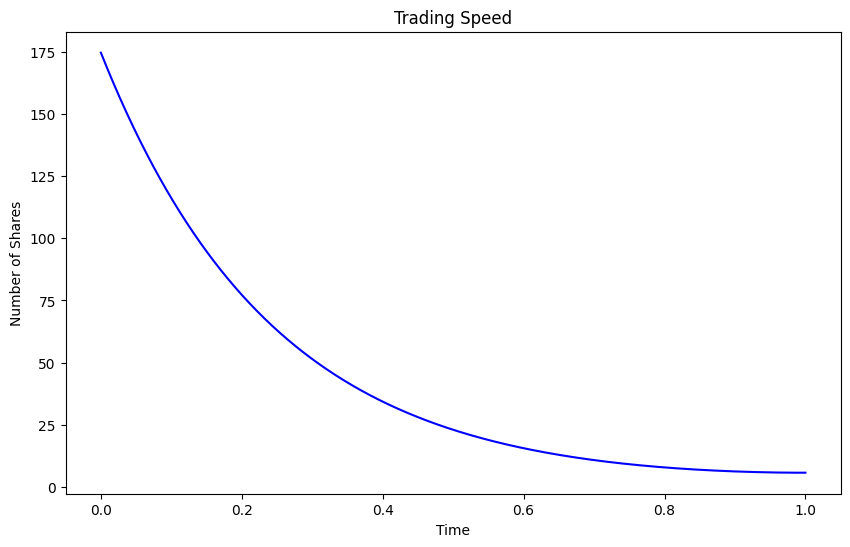

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

In [85]:
print( f'She starts to sell shares by speed of {round(v[1,0], 2)} shares in each step and its speed. In time 0.5 of liquidatin period speed decrease to {round(v[np.where(tt == 0.5)[0][0],0],2)} shares/step. In the ending time is {round(v[-1,0], 2)} shares.')

She starts to sell shares by speed of 174.56 shares in each step and its speed. In time 0.5 of liquidatin period speed decrease to 23.04 shares/step. In the ending time is 5.79 shares.


Text(0.5, 1.0, 'Inventory')

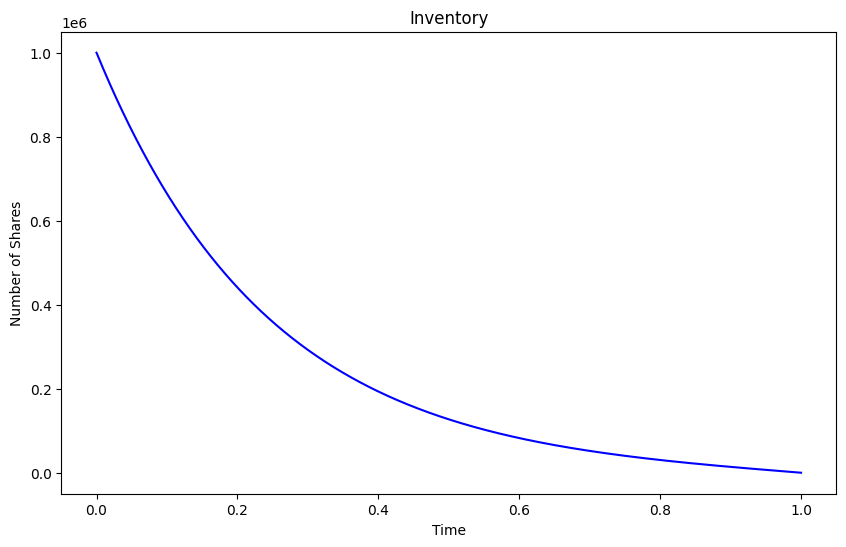

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

In [86]:
print(f'In time zero she has {round(q[0][0])} shares to liquid. In the middle of selling process {round(q[np.where(tt == 0.5)[0][0],0],2)} lefts. and at the end, there are {round(q[-1][0])} shares left')

In time zero she has 1000000 shares to liquid. In the middle of selling process 127839.69 lefts. and at the end, there are 814 shares left


### part f and g 

In [41]:
def inter_extrapolation(x, y, e):
    """ Extrapolation and interpolation.
    
    :param x: a numpy array
    :param y: a numpy array
    :param e: a numpy array, equivalent of x
    :return: a numpy array
    """
    new_x = np.sort(x)
    new_y = y[np.argsort(x)]

    def point_wise(ep):
        if ep < new_x[0]:
            return new_y[0] + (ep - new_x[0]) * (new_y[1] - new_y[0]) / (new_x[1] - new_x[0])
        elif ep > new_x[-1]:
            return new_y[-1] + (ep - new_x[-1]) * (new_y[-1] - new_y[-2]) / (new_x[-1] - new_x[-2])
        else:
            return np.interp([ep], x, y)[0]
    return np.array([point_wise(i) for i in e])

In [42]:
def calculate_inventory_trading_speed(alpha, phi, t, tt, T, b, k):
    """ For given points t, this function solve for the optimal speed of trading as nu, and investor's inventory along the
        optimal path as Q. 
        This function also returns optimal speed of trading as nut, and investor's inventory along the optimal path Qt as a
        function of time, tt, which is a vector of "infinitely" small time interval.
    """
    tau = T - t
    zeta = ((alpha - 0.5 * b) + np.sqrt(k * phi)) / ((alpha - 0.5 * b) - np.sqrt(k * phi))
    gamma = np.sqrt(phi / k)
    chi = np.sqrt(k * phi) * np.divide(1 + zeta * np.exp(2 * gamma * tau), 1 - zeta * np.exp(2 * gamma * tau))
    Q = np.divide(zeta * np.exp(gamma * tau) - np.exp(-gamma * tau), zeta * np.exp(gamma * T) - np.exp(-gamma * T))
    nu = np.multiply(-chi, Q) / k
    Qt = inter_extrapolation(t, Q, tt)
    nut = inter_extrapolation(t, nu, tt)
    return Q, nu, Qt, nut


def plot_inventory_trading_speed(alpha0, phi, symb, t, tt, T, b, k, labels, main):
    """ This function plots Fig 6.2 using above function to calculate inventory and speed of tading vs time.
    """
    fig, (ax_inv, ax_trad) = plt.subplots(ncols=2)
    fig.set_size_inches(10.5, 5.5)
    color_idx = np.linspace(0, 1, phi.shape[0])
    for i, line in zip(color_idx, range(0, phi.shape[0])):
        inv_line, trad_line, inv_dot, trad_dot = calculate_inventory_trading_speed(alpha0, phi[line], t, tt, T, b, k)
        plt1, = ax_inv.plot(tt, inv_dot, color=plt.cm.rainbow(i), label=labels[line], marker=symb[line], linestyle='None')
        plt2, = ax_trad.plot(tt, trad_dot, color=plt.cm.rainbow(i), label=labels[line], marker=symb[line], linestyle='None')
        plt3, = ax_inv.plot(t, inv_line, linestyle='-', color=plt.cm.rainbow(i))
        plt4, = ax_trad.plot(t, trad_line, linestyle='-', color=plt.cm.rainbow(i))
    ax_inv.legend()
    ax_inv.set_xlabel(r"Time", fontsize=18)
    ax_inv.set_ylabel(r"Inventory", fontsize=18)
    ax_trad.legend()
    ax_trad.set_xlabel(r"Time", fontsize=18)
    ax_trad.set_ylabel(r"Trading Speed", fontsize=18)
    ax_trad.yaxis.set_label_coords(-0.1,0.5)
    plt.suptitle(main, fontsize=20)
    fig.canvas.draw()

In [43]:
def slider_plot_inventory_trading_speed(phi, symb, t, tt, T, b, k, labels):
    """ This function returns a dynamic version of above plot with penalty term alpha controlled by a dynamic slider.
        For demonstration purposes, only alpha = 0.01, and alpha = 100 (as an approximation of positive infinity) are plotted.
        To use this function, call this function on the main file using same argument as above function, but remove 'alpha0' 
        parameter since you do not need to specify alpha here. Then, mannually recompile Liquidation_Permanent_Price_Impact file
        to use the slider.
    """
    def update(alpha):
        fig, (ax_inv, ax_trad) = plt.subplots(ncols=2)
        color_idx = np.linspace(0, 1, phi.shape[0])
        for i, line in zip(color_idx, range(0, phi.shape[0])):
            inv_line, trad_line, inv_dot, trad_dot = calculate_inventory_trading_speed(alpha, phi[line], t, tt, T, b, k)
            plt1, = ax_inv.plot(tt, inv_dot, color=plt.cm.rainbow(i), label=labels[line], marker=symb[line], linestyle='None')
            plt2, = ax_trad.plot(tt, trad_dot, color=plt.cm.rainbow(i), label=labels[line], marker=symb[line], linestyle='None')
            plt3, = ax_inv.plot(t, inv_line, linestyle='-', color=plt.cm.rainbow(i))
            plt4, = ax_trad.plot(t, trad_line, linestyle='-', color=plt.cm.rainbow(i))
        ax_inv.legend()
        ax_inv.set_xlabel(r"Time", fontsize=18)
        ax_inv.set_ylabel(r"Inventory", fontsize=18)
        ax_trad.legend()
        ax_trad.set_xlabel(r"Time", fontsize=18)
        ax_trad.set_ylabel(r"Trading Speed", fontsize=18)
        ax_trad.yaxis.set_label_coords(-0.1,0.5)
        plt.suptitle(r"\alpha = " + str(alpha), fontsize=20)
        fig.canvas.draw()
    return interactive(update, {'manual': False}, alpha=widgets.FloatSlider(min=0.01, max=100, step=0.01, value=alpha0))

In [44]:
def solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq):
    """ This function solves for optimal trading speed in feed back form as nus, and inventory of optimal path as Qs.
    They are used to be presented as a function of time, t.
    """
    t = np.arange(0, T+dt, dt)
    q = np.arange(0, qmax+dq, dq)

    myleg = []

    nus = np.full((Ndt+1, a.shape[0]), np.NaN)
    Qs = np.full((Ndt+1, a.shape[0]), np.NaN)
    Qs[0,:] = qmax

    for i in range(0, a.shape[0], 1):
        xi = (a[i] * k) / ((1 + a[i]) * k) ** (1 + 1/a[i])

        g = np.full((Ndq+1, Ndt+1), np.NaN)
        nu = np.full((Ndq+1, Ndt+1), np.NaN)
        
        g[:, g.shape[1]-1] = -(alpha ** a[i]) / k ** (a[i] - 1) * np.power(q, 1 + a[i]) + 0.5 * b * np.power(q, 2)

        for j in range(Ndt-1, -1, -1):

            # Explicit Scheme
            dqg = (g[1:g.shape[0], j+1] - g[0:(g.shape[0]-1), j+1]) / dq
            g[1:g.shape[0], j] = g[1:g.shape[0], j+1] + dt * (-phi * np.power(q[1:q.shape[0]], 2) + xi * (np.power(-dqg, 1 + 1 / a[i])))
            g[0, j] = 0

            dqg = (g[1:g.shape[0], j] - g[0:(g.shape[0]-1), j]) / dq
            nu[1:nu.shape[0], j] = np.power(-dqg / ((1 + a[i]) * k), 1 / a[i])
            nu[0, j] = 0

            # Implicit-explicit scheme
            g[:, j] = np.real(g[:, j])
            nu[:, j] = np.real(nu[:, j])

        for j in range(0, Ndt, 1):
            nus[j, i] = inter_extrapolation(q, nu[:, j], [Qs[j, i]])
            Qs[j+1, i] = Qs[j, i] - nus[j, i] * dt

        myleg.append("$a=" + str(a[i]) + "$")
    return nus, Qs, myleg, t, q

In [45]:
def plot_multiple(x, y, xlab=None, ylab=None, main=None, labels=None):
    """ This is a plotting function intended to plot multiple Ys for a single x.
    """
    color_idx = np.linspace(0, 1, y.shape[0])
    for i, line in zip(color_idx, range(0, y.shape[0])):
        if labels is not None:
            plt.plot(x, y[line, :], color=plt.cm.rainbow(i), label=labels[line], linestyle='-')
        else:
            plt.plot(x, y[line, :], color=plt.cm.rainbow(i), linestyle='-')
    if xlab is not None:
        plt.xlabel(xlab, fontsize=18)
    if ylab is not None:
        plt.ylabel(ylab, fontsize=18)
    if main is not None:
        plt.title(main, fontsize=12)
    if labels is not None:
        plt.legend()
    plt.show()

## Parameter Settings

In [46]:
# Parameter settings
T = 1
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.0006
b = 0.0004

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-10, 0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100

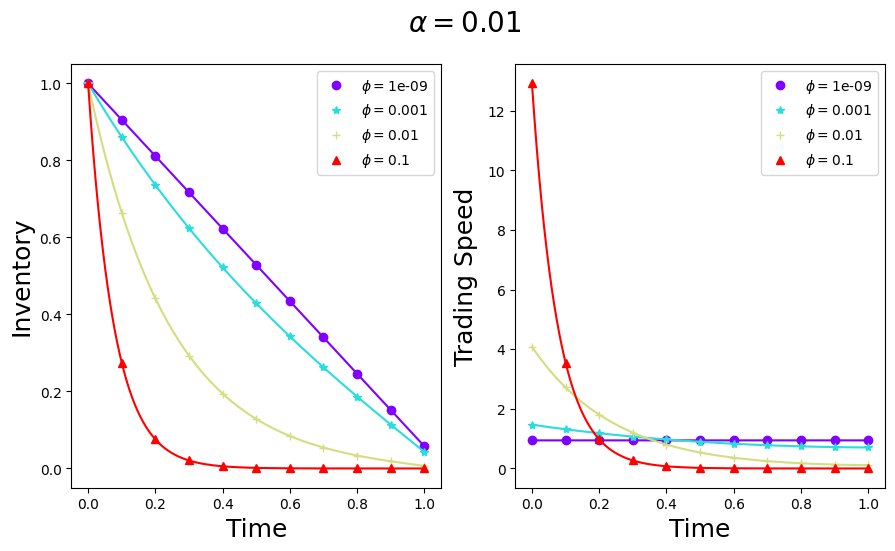

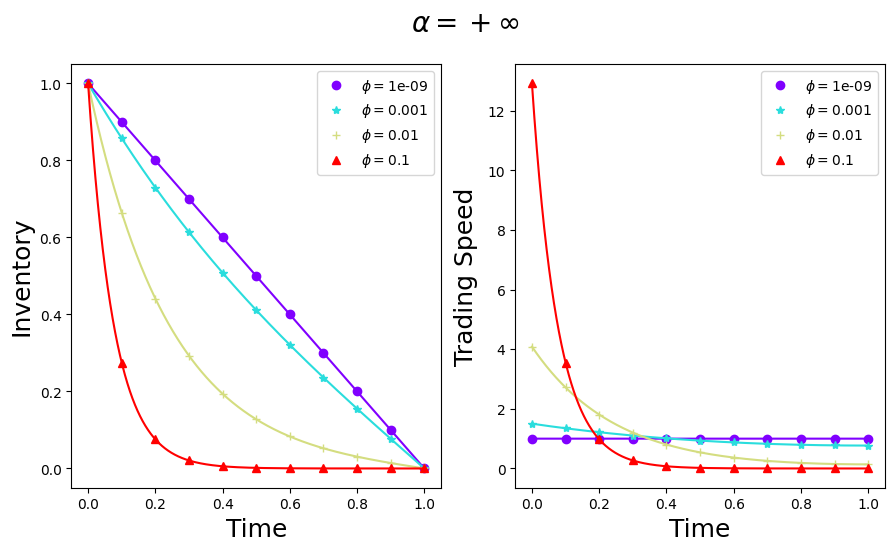

In [47]:
# Fig 6.2 of Page 148
plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")

In [48]:
# Parameter Settings
a = np.array([1, 0.8, 0.6])
# k = 0.0001
# b = 0.0001

phi = 10 * k
alpha = 100 * k
T = 1
qmax = 1

Ndt = 10000
Ndq = 100

dt = T / Ndt
dq = qmax / Ndq

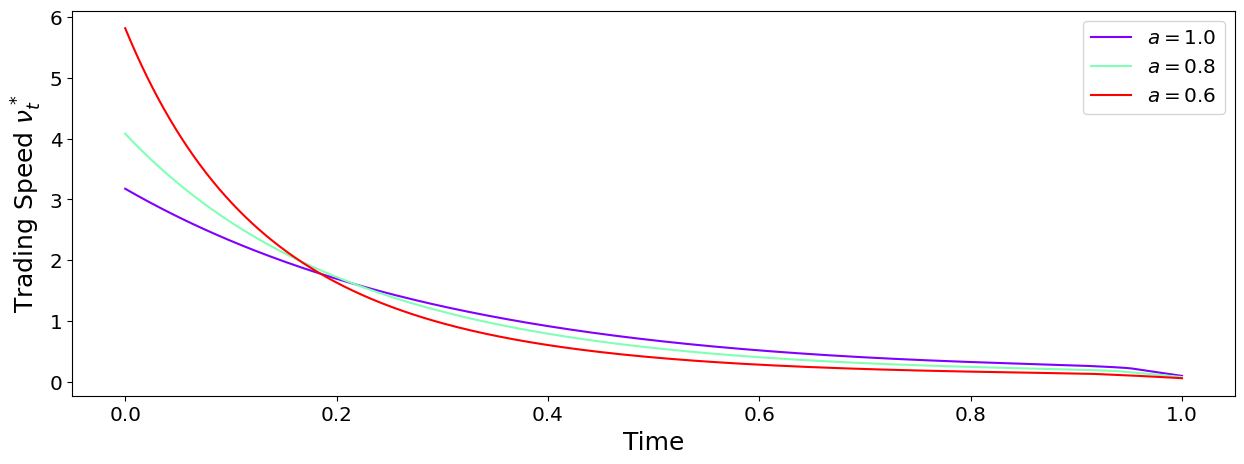

In [21]:
nus, Qs, myleg, t, q = solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq)

plot_multiple(t, nus.T, r"Time", r"Trading Speed $\nu^*_t$", None, myleg)
